# Kendal correlation between levels

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Misc functions

In [2]:
MAX_V_VALUE = 18470

def select_max_k(df):
    df.groupby(['node','s'], sort=False)['k'].max()
    idx = df.groupby(['node','s'])['k'].transform(max) == df['k']
    df_k_max = df[idx][['node','number_influenced','s']]
    return df_k_max

def generate_pivot_df(df_k_max):
    pivot_df = []

    for n in df_k_max['node'].unique():
        df_nodes = df_k_max.loc[df_k_max['node'] == n]
        df_nodes = df_nodes.set_index('node', drop=True)
        pivot_df.append(df_nodes.pivot_table(values='number_influenced',
                                             index=df_nodes.index,
                                             columns='s').reset_index(drop=True))
    df_to_corr = pd.concat(pivot_df)
    
    return df_to_corr

## Plurality

In [3]:
df = pd.read_csv('parallel_merge_plurality.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,0,9,8,1
2,1,9,40,1
3,2,9,65,1
4,0,9,282,2


In [4]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,9,1,0
3,9,65,1
6,9,508,2
13,9,6838,3
17,9,13230,4


In [5]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [6]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,65.0,508.0,6838.0,13230.0,17638.0,18233.0,18375.0,18453.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,2.0,817.0,1710.0,7726.0,13933.0,17693.0,18267.0,18390.0,18457.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,2.0,817.0,1710.0,7726.0,13933.0,17693.0,18267.0,18390.0,18457.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,9.0,456.0,4400.0,10387.0,15892.0,17850.0,18272.0,18410.0,18461.0,18469.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,2.0,132.0,673.0,6266.0,12884.0,17458.0,18233.0,18403.0,18464.0,18469.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0


In [7]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.257814,0.130736,0.142869,0.134578,0.136407,0.122137,0.121187,0.113951,0.108952,0.108494,0.066013,0.024283,0.003740,0.004708,-0.015329,0.002364,NaN
1,0.257814,1.000000,0.434817,0.592668,0.461915,0.510984,0.424719,0.431113,0.391482,0.391281,0.385763,0.320931,0.205030,0.090749,0.054039,0.018179,0.006441,NaN
2,0.130736,0.434817,1.000000,0.673069,0.746192,0.653775,0.675534,0.616642,0.606312,0.604649,0.556758,0.574455,0.354966,0.156577,0.074336,0.029930,0.010230,NaN
3,0.142869,0.592668,0.673069,1.000000,0.726437,0.734802,0.641066,0.623007,0.565318,0.569745,0.538677,0.529348,0.398641,0.179640,0.092755,0.031961,0.010180,NaN
4,0.134578,0.461915,0.746192,0.726437,1.000000,0.815326,0.831751,0.725438,0.701045,0.680491,0.614717,0.599188,0.395011,0.185259,0.097932,0.032818,0.010393,NaN
5,0.136407,0.510984,0.653775,0.734802,0.815326,1.000000,0.853811,0.838394,0.744991,0.735326,0.680122,0.616245,0.404062,0.184736,0.098450,0.032899,0.010417,NaN
6,0.122137,0.424719,0.675534,0.641066,0.831751,0.853811,1.000000,0.858336,0.810427,0.772343,0.703147,0.652352,0.402016,0.185317,0.098183,0.032898,0.010420,NaN
7,0.121187,0.431113,0.616642,0.623007,0.725438,0.838394,0.858336,1.000000,0.813912,0.791149,0.744983,0.657639,0.407153,0.185377,0.098388,0.032933,0.010428,NaN
8,0.113951,0.391482,0.606312,0.565318,0.701045,0.744991,0.810427,0.813912,1.000000,0.805682,0.752947,0.689153,0.402032,0.186151,0.098624,0.033007,0.010448,NaN


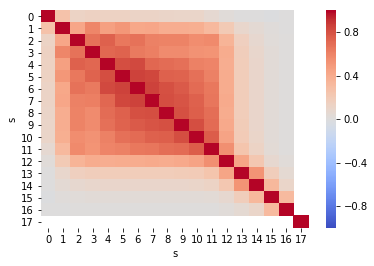

In [8]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Min

In [9]:
df = pd.read_csv('parallel_merge_min.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,1,9,2,0
2,2,9,4,0
3,3,9,7,0
4,4,9,23,0


In [10]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
14,9,4107,0
23,9,4121,1
31,9,4169,2
38,9,8211,3
42,9,13486,4


In [11]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [12]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4107.0,4121.0,4169.0,8211.0,13486.0,17692.0,18255.0,18379.0,18454.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,3.0,3.0,4133.0,4258.0,8568.0,13326.0,17564.0,18223.0,18424.0,18458.0,18469.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,3.0,3.0,4933.0,5342.0,9498.0,14192.0,17741.0,18285.0,18395.0,18458.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,4107.0,4108.0,4164.0,6428.0,10369.0,16667.0,17991.0,18371.0,18420.0,18462.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,4111.0,4112.0,4495.0,6577.0,12732.0,16819.0,18074.0,18347.0,18447.0,18463.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0


In [13]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.303146,0.332162,0.201021,0.275295,0.205026,0.240352,0.190774,0.213978,0.200813,0.170777,0.207181,0.144834,0.069709,0.036321,0.010944,0.009351,NaN
1,0.303146,1.000000,0.164294,0.504539,0.306556,0.404441,0.298767,0.332484,0.273524,0.283961,0.280349,0.239469,0.220730,0.109216,0.064686,0.018954,0.003883,NaN
2,0.332162,0.164294,1.000000,0.517352,0.659213,0.521505,0.586551,0.505180,0.522155,0.523059,0.476745,0.519266,0.328746,0.172458,0.091384,0.031666,0.010352,NaN
3,0.201021,0.504539,0.517352,1.000000,0.657170,0.712460,0.615430,0.612549,0.546173,0.571652,0.533056,0.526995,0.388036,0.180257,0.095382,0.032353,0.010283,NaN
4,0.275295,0.306556,0.659213,0.657170,1.000000,0.795311,0.840381,0.720072,0.709805,0.694796,0.625057,0.615226,0.394053,0.184541,0.098133,0.032830,0.010399,NaN
5,0.205026,0.404441,0.521505,0.712460,0.795311,1.000000,0.839120,0.832614,0.729717,0.733636,0.676122,0.615968,0.405338,0.184650,0.098136,0.032891,0.010417,NaN
6,0.240352,0.298767,0.586551,0.615430,0.840381,0.839120,1.000000,0.836373,0.798749,0.768317,0.697398,0.654172,0.401535,0.185356,0.098054,0.032893,0.010417,NaN
7,0.190774,0.332484,0.505180,0.612549,0.720072,0.832614,0.836373,1.000000,0.788248,0.776086,0.731651,0.650931,0.407814,0.185404,0.098430,0.032935,0.010430,NaN
8,0.213978,0.273524,0.522155,0.546173,0.709805,0.729717,0.798749,0.788248,1.000000,0.784636,0.744695,0.682646,0.396836,0.186224,0.098647,0.033015,0.010451,NaN


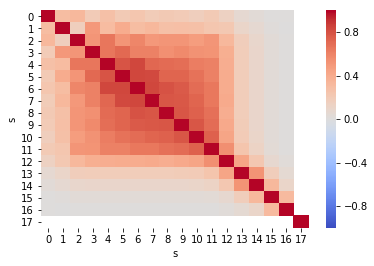

In [14]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Max

In [15]:
df = pd.read_csv('parallel_merge_max.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,0,9,8,1
2,1,9,39,1
3,2,9,44,1
4,0,9,282,2


In [16]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,9,1,0
3,9,44,1
6,9,474,2
10,9,6074,3
13,9,13172,4


In [17]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [18]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,44.0,474.0,6074.0,13172.0,17633.0,18232.0,18374.0,18453.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,17.0,146.0,2561.0,8217.0,16158.0,17970.0,18365.0,18441.0,18469.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,3.0,468.0,3829.0,10768.0,15801.0,17935.0,18295.0,18444.0,18462.0,18464.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,2.0,32.0,335.0,4883.0,8633.0,15114.0,17540.0,18244.0,18409.0,18460.0,18463.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,2.0,107.0,135.0,1569.0,6434.0,15813.0,17786.0,18334.0,18420.0,18454.0,18467.0,18469.0,18470.0,18470.0,18470.0,18470.0,18470.0


In [19]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.257606,0.129217,0.142264,0.136419,0.136747,0.123200,0.122145,0.115080,0.110205,0.109490,0.066635,0.024161,0.003900,0.004122,-0.015773,0.002330,NaN
1,0.257606,1.000000,0.435652,0.587629,0.474836,0.512635,0.427492,0.432394,0.393597,0.392320,0.386504,0.321932,0.205752,0.090840,0.053920,0.018140,0.006432,NaN
2,0.129217,0.435652,1.000000,0.700654,0.743089,0.651637,0.667479,0.611827,0.599410,0.598042,0.551322,0.572164,0.353920,0.156148,0.073874,0.029899,0.010229,NaN
3,0.142264,0.587629,0.700654,1.000000,0.762008,0.747800,0.660747,0.637283,0.583340,0.587097,0.552987,0.545249,0.398509,0.179593,0.092695,0.031957,0.010180,NaN
4,0.136419,0.474836,0.743089,0.762008,1.000000,0.825841,0.822491,0.721588,0.696140,0.676832,0.613698,0.597540,0.397242,0.185245,0.097927,0.032817,0.010394,NaN
5,0.136747,0.512635,0.651637,0.747800,0.825841,1.000000,0.857282,0.834166,0.743125,0.732752,0.676993,0.615627,0.403658,0.184878,0.098444,0.032905,0.010417,NaN
6,0.123200,0.427492,0.667479,0.660747,0.822491,0.857282,1.000000,0.859154,0.810176,0.772162,0.702737,0.651952,0.402110,0.185263,0.098196,0.032900,0.010419,NaN
7,0.122145,0.432394,0.611827,0.637283,0.721588,0.834166,0.859154,1.000000,0.814503,0.791827,0.745594,0.658380,0.407105,0.185376,0.098378,0.032931,0.010428,NaN
8,0.115080,0.393597,0.599410,0.583340,0.696140,0.743125,0.810176,0.814503,1.000000,0.807665,0.754789,0.690613,0.402453,0.186105,0.098549,0.033012,0.010448,NaN


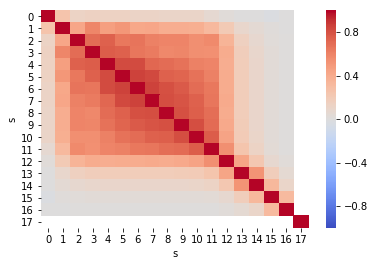

In [20]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Random

In [21]:
df = pd.read_csv('parallel_merge_random_2_rt_pol.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,0,9,8,1
2,1,9,59,1
3,2,9,91,1
4,3,9,104,1


In [22]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,9,1,0
6,9,111,1
12,9,616,2
18,9,6214,3
21,9,12972,4


In [23]:
level_dummy_df = []

for l in range(18):
    level_dummy_df.append({'s':l})

df_levels = pd.DataFrame(level_dummy_df)

list_to_contact_df = []

for n in df_k_max['node'].unique():    
    df_sub_to_fill = df_k_max.loc[df_k_max['node'] == n]
    df_sub_w_lvls = pd.merge(df_sub_to_fill, df_levels, how='outer', on=['s'])
    df_sub_w_lvls['node'] = df_sub_w_lvls['node'].fillna(n)
    df_sub_w_lvls['number_influenced'] = df_sub_w_lvls['number_influenced'].fillna(MAX_V_VALUE)
    list_to_contact_df.append(df_sub_w_lvls)
    
df_k_max = pd.concat(list_to_contact_df)

In [24]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,111.0,616.0,6214.0,12972.0,17564.0,18227.0,18375.0,18453.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,2.0,1041.0,3310.0,11416.0,15273.0,17902.0,18269.0,18412.0,18461.0,18469.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,5.0,715.0,3827.0,10537.0,15732.0,17908.0,18288.0,18442.0,18462.0,18464.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,1.0,2.0,820.0,1779.0,7430.0,13591.0,17614.0,18261.0,18389.0,18457.0,18468.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0
0,2.0,29.0,616.0,4788.0,9382.0,15713.0,17737.0,18258.0,18411.0,18461.0,18469.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0,18470.0


In [25]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.228381,0.111133,0.116116,0.112794,0.107877,0.097671,0.091266,0.091579,0.076823,0.081538,0.034308,-0.011322,0.005276,0.009435,0.003130,0.002941,NaN
1,0.228381,1.000000,0.414700,0.593446,0.457671,0.501998,0.417773,0.417551,0.375245,0.375622,0.369492,0.307121,0.204641,0.090152,0.056257,0.018504,0.006515,NaN
2,0.111133,0.414700,1.000000,0.699560,0.764662,0.669516,0.684906,0.621980,0.611494,0.606000,0.557134,0.578266,0.362289,0.160085,0.077225,0.030191,0.010239,NaN
3,0.116116,0.593446,0.699560,1.000000,0.752264,0.750089,0.662725,0.632015,0.573353,0.581435,0.545166,0.537706,0.399386,0.180083,0.093320,0.032017,0.010183,NaN
4,0.112794,0.457671,0.764662,0.752264,1.000000,0.834520,0.834549,0.727958,0.702670,0.683810,0.618461,0.602020,0.396446,0.185246,0.097994,0.032823,0.010392,NaN
5,0.107877,0.501998,0.669516,0.750089,0.834520,1.000000,0.867106,0.830684,0.743635,0.732924,0.674775,0.615240,0.404052,0.184769,0.098436,0.032909,0.010417,NaN
6,0.097671,0.417773,0.684906,0.662725,0.834549,0.867106,1.000000,0.859084,0.806518,0.771004,0.698739,0.648862,0.402297,0.185313,0.098194,0.032898,0.010420,NaN
7,0.091266,0.417551,0.621980,0.632015,0.727958,0.830684,0.859084,1.000000,0.818995,0.793549,0.741883,0.658271,0.407021,0.185369,0.098394,0.032931,0.010428,NaN
8,0.091579,0.375245,0.611494,0.573353,0.702670,0.743635,0.806518,0.818995,1.000000,0.806223,0.756361,0.687931,0.402560,0.186149,0.098621,0.033006,0.010450,NaN


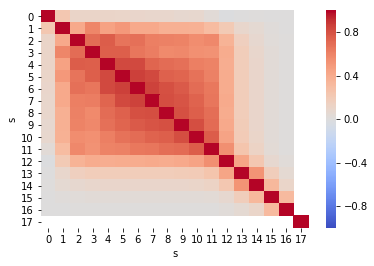

In [26]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')